## 作業
在鐵達尼資料集中，
透過進階補值方法 KNN，將鐵達尼號中的 Titanic_train
.csv 中的 age 的遺失值進行補值。    
* step1: 觀察 Age 和 Pclass 與 Sex 是否有關連性?
* step2: 如果有關連性，運用 KNN ，取出 Age 、 Pclass、 Sex的資料，以 Sex 與 Pclass 補 Age 遺失值。 

In [15]:
# import library
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from scipy import stats
import math
import statistics
import seaborn as sns
from IPython.display import display

## 讀入資料

In [16]:
d_train = pd.read_csv("D35_Titanic_train.csv")

## 觀察 Age

step1：觀察 Age 和 Pclass 和 Sex 是否有關連性?
step2：如果有關連性，運用 KNN ，取出 Age 、 Pclass、 Sex的資料，以 Sex 與 Pclass 補 Age 遺失值。 

In [18]:
#from sklearn.metrics.pairwise import nan_euclidean_distances
#display(pd.DataFrame(nan_euclidean_distances(d_train["Age","Pclass","Sex"])))
a = d_train.isnull().sum()/len(d_train)
a.sort_values(ascending=False)

Cabin          0.771044
Age            0.198653
Embarked       0.002245
Fare           0.000000
Ticket         0.000000
Parch          0.000000
SibSp          0.000000
Sex            0.000000
Name           0.000000
Pclass         0.000000
Survived       0.000000
PassengerId    0.000000
dtype: float64

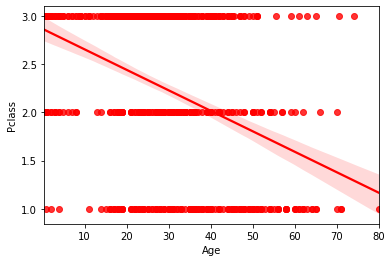

In [28]:
sns.regplot(x="Age", y="Pclass", color="r", data=d_train)
#sns.regplot(x="Age", y="Sex", color="b", data=d_train)
#sns.regplot(x="Pclass", y="Sex", color="g", data=d_train)

In [46]:
data = pd.concat([d_train["Age"],d_train["Pclass"],d_train["Sex"]],axis=1)
data

,Age,Pclass,Sex
0,22.0,3,male
1,38.0,1,female
2,26.0,3,female
3,35.0,1,female
4,35.0,3,male
...,...,...,...
886,27.0,2,male
887,19.0,1,female
888,NaN,3,female
889,26.0,1,male


In [48]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
data['Sex']=le.fit_transform(data['Sex'])
data

,Age,Pclass,Sex
0,22.0,3,1
1,38.0,1,0
2,26.0,3,0
3,35.0,1,0
4,35.0,3,1
...,...,...,...
886,27.0,2,1
887,19.0,1,0
888,NaN,3,0
889,26.0,1,1


In [76]:
from sklearn.metrics.pairwise import nan_euclidean_distances
data2 = pd.DataFrame(nan_euclidean_distances(data))
data2
#找出最小值的index, columns

,0,1,2,3,4,5,6,7,8,9,...,881,882,883,884,885,886,887,888,889,890
0,0.000000,16.155494,4.123106,13.190906,13.000000,0.000000,32.062439,20.000000,5.099020,8.124038,...,11.000000,1.000000,6.082763,3.000000,17.029386,5.099020,3.741657,1.224745,4.472136,10.000000
1,16.155494,0.000000,12.165525,3.000000,3.741657,2.738613,16.031220,36.069378,11.180340,24.020824,...,5.477226,16.124515,10.099505,13.190906,2.236068,11.090537,19.000000,2.449490,12.041595,6.403124
2,4.123106,12.165525,0.000000,9.219544,9.055385,1.224745,28.089144,24.020824,1.000000,12.041595,...,7.071068,4.000000,2.449490,1.414214,13.000000,1.732051,7.280110,0.000000,2.236068,6.082763
3,13.190906,3.000000,9.219544,0.000000,2.236068,2.738613,19.026298,33.075671,8.246211,21.023796,...,3.000000,13.152946,7.141428,10.246951,4.472136,8.124038,16.000000,2.449490,9.055385,3.741657
4,13.000000,3.741657,9.055385,2.236068,0.000000,0.000000,19.104973,33.000000,8.062258,21.047565,...,2.000000,13.038405,7.071068,10.000000,4.123106,8.062258,16.155494,1.224745,9.219544,3.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,5.099020,11.090537,1.732051,8.124038,8.062258,1.224745,27.018512,25.019992,1.414214,13.038405,...,6.082763,5.196152,1.000000,2.236068,12.083046,0.000000,8.124038,1.732051,1.414214,5.099020
887,3.741657,19.000000,7.280110,16.000000,16.155494,2.738613,35.014283,17.146428,8.246211,5.099020,...,14.177447,3.605551,9.110434,6.403124,20.099751,8.124038,0.000000,2.449490,7.071068,13.190906
888,1.224745,2.449490,0.000000,2.449490,1.224745,1.224745,2.738613,1.224745,0.000000,1.224745,...,1.224745,0.000000,1.732051,1.224745,0.000000,1.732051,2.449490,0.000000,2.738613,1.224745
889,4.472136,12.041595,2.236068,9.055385,9.219544,2.449490,28.000000,24.083189,2.449490,12.083046,...,7.280110,4.582576,2.236068,2.236068,13.190906,1.414214,7.071068,2.738613,0.000000,6.324555


In [120]:
from sklearn.impute import KNNImputer
imputer = KNNImputer(n_neighbors=1)
df_filled = pd.DataFrame(imputer.fit_transform(data))
df_filled

,0,1,2
0,22.0,3.0,1.0
1,38.0,1.0,0.0
2,26.0,3.0,0.0
3,35.0,1.0,0.0
4,35.0,3.0,1.0
...,...,...,...
886,27.0,2.0,1.0
887,19.0,1.0,0.0
888,26.0,3.0,0.0
889,26.0,1.0,1.0


In [122]:
data

,Age,Pclass,Sex
0,22.0,3,1
1,38.0,1,0
2,26.0,3,0
3,35.0,1,0
4,35.0,3,1
...,...,...,...
886,27.0,2,1
887,19.0,1,0
888,NaN,3,0
889,26.0,1,1
